# Heart Disease Prediction
***Predict a person's heart health***

***Dataset Link - https://archive.ics.uci.edu/ml/datasets/heart+disease**

This dataset comprises of the below given attributes which will be used to predict a person's heart health and thereby heart disease using Machine Learning and Analytics techniques.

## Attributes
- age
- sex
- chest pain type (4 values)[typical angina(0)/atypical angina(1)/non-anginal pain(2)/asymptotic(3)]
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl(yes/no)
- resting electrocardiographic results (Normal(0),ST-Wave Abnormality(1),left ventricular hypertrophy(2))
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## Acknowledgements
### Creators:

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert  Detrano, M.D., Ph.D.
- Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

## Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

# Data Analysis and Preprocessing

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

## Dataset Analysis

In [3]:
# Importing the dataset
dataset = pd.read_csv("heart_disease.csv")

In [4]:
# Returns the number of rows and cols of the dataset
dataset.shape

(303, 14)

In [5]:
# Returns an object with all of the column headers
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# Returns datatypes for each column
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# Peeking into dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Plotting the target values
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
neg = len(dataset[dataset.target==0])
pos = len(dataset[dataset.target==1])
tot = len(dataset.target)
print("% not having heart disease : {:.2f}%".format((neg/(tot))*100))
print("% having heart disease: {:.2f}%".format((pos/(tot))*100))

% not having heart disease : 45.54%
% having heart disease: 54.46%


<AxesSubplot:xlabel='target', ylabel='count'>

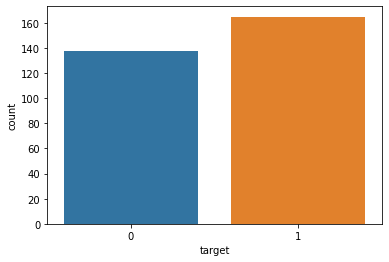

In [10]:
# Plotting the target values to check if the dataset is balanced or not
sns.countplot(x = "target", data = dataset)

In [11]:
# Checking for null values in columns
dataset.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [12]:
# Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# Stats on numeric columns
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Data Visualization

In [14]:
# Importing the libraries
import matplotlib.pyplot as plt
%matplotlib inline

/Users/priyanshisharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


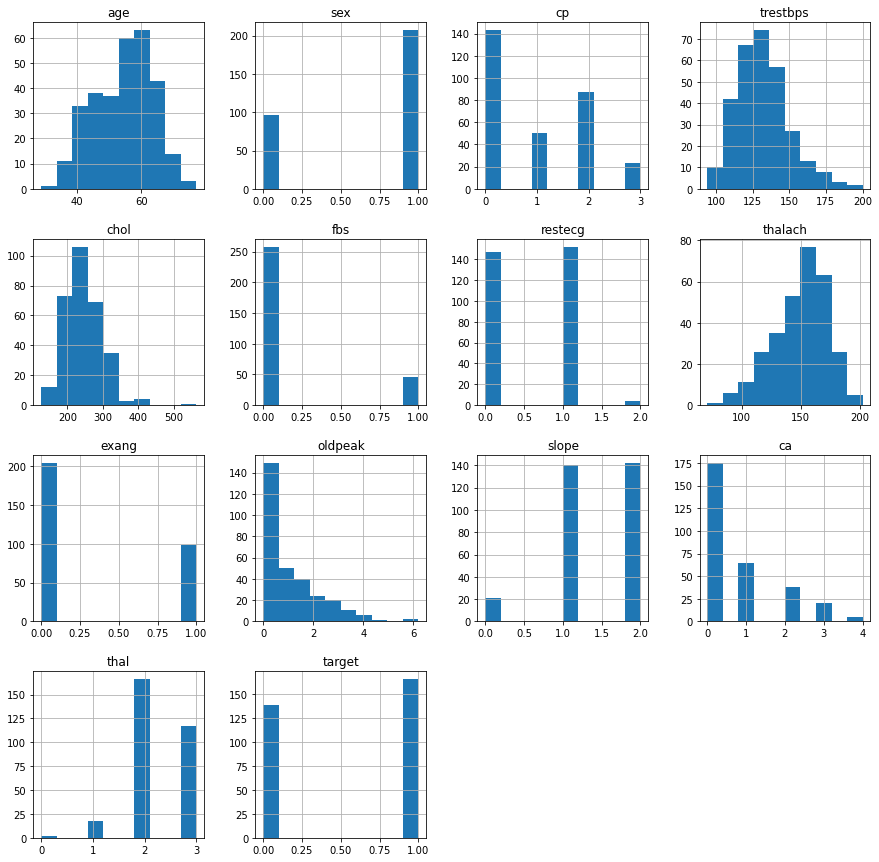

In [15]:
# Statistics
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = dataset.hist(ax=ax)

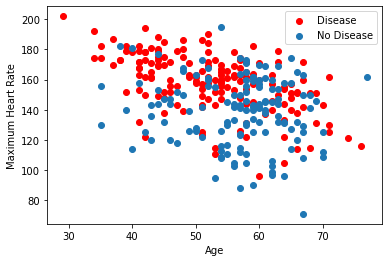

In [16]:
# Scatter plot for analysing the age factor
plt.scatter(x=dataset.age[dataset.target==1], y=dataset.thalach[(dataset.target==1)], c="red")
plt.scatter(x=dataset.age[dataset.target==0], y=dataset.thalach[(dataset.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

## Feature Engineering

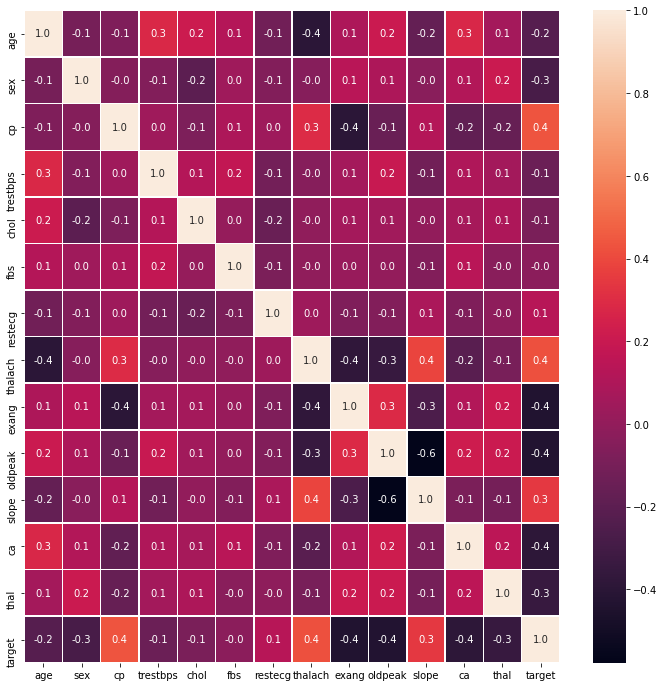

In [17]:
# Feature Selection
# Selecting correlated features using Heatmap

f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Data Preprocessing
### Categorical Variables
After analysing the dataset, some of the variables came out to be categorical. We need to encode them before proceeding further.

In [18]:
dataset = pd.get_dummies(dataset, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

## Feature Scaling

In [19]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [21]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [22]:
# Splitting the dataset into dependent variable vector and independent features
X = dataset.drop('target', axis=1)
y = dataset['target']

# Classifier Techniques
We will look at 4 different algorithms and see which works best and save that.
1. Logistic Regression
2. Support Vector Machines
3. K-Nearest-Neighbors
4. Decision Tree
5. Random Forest

## Grid Search

In [23]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



# Creating a function to calculate best model for this problem
def find_opt_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [3, 5, 10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        },
        'knn' : {
              'model' : KNeighborsClassifier(),
              'parameters' : {
                  'n_neighbors' : [5, 9, 10, 11, 12]
              }
        }
      }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_parameters', 'score'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

find_opt_model(X_train, y_train)

 

X_train size: (227, 30), X_test size: (76, 30)


,model,best_parameters,score
0,logistic_regression,{'C': 1},0.863043
1,decision_tree,"{'criterion': 'gini', 'max_depth': 3}",0.797826
2,random_forest,{'n_estimators': 100},0.839130
3,svm,"{'C': 1, 'kernel': 'rbf'}",0.843478
4,knn,{'n_neighbors': 10},0.854348


## Analysing each Algorithm

## Logistic Regression

Text(0.5, 1.0, 'Logistic Regression Classifier scores for different C values')

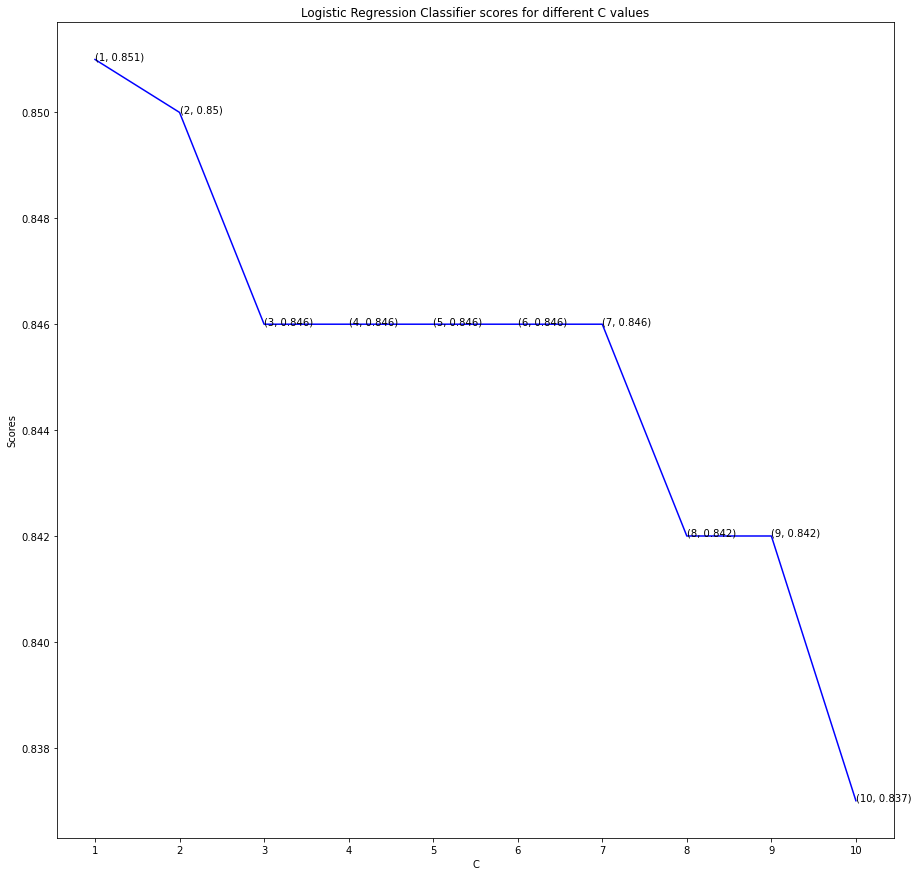

In [24]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Finding the best accuracy using cross val score
cross_val_scores = []
for i in range(1, 11):
  classifier_lr = LogisticRegression(solver='lbfgs', multi_class='auto', C = i)
  scores = cross_val_score(classifier_lr, X_train, y_train, cv = 10)
  cross_val_scores.append(round(scores.mean(), 3))

# Plotting the scores
plt.figure(figsize = (15, 15))
plt.plot([c for c in range(1, 11)], cross_val_scores, color = 'blue')
for i in range(1,11):
    plt.text(i, cross_val_scores[i-1], (i, cross_val_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('C')
plt.ylabel('Scores')
plt.title('Logistic Regression Classifier scores for different C values')

In [25]:
# Training the linear regression classifier model with c value as 1
classifier_lr = LogisticRegression(solver='lbfgs', multi_class='auto', C = 1)
scores = cross_val_score(classifier_lr, X_train, y_train, cv = 10)
print("Linear Regression Classifier Accuracy(C = 1) : {}%".format(round(scores.mean(), 4)*100))

Linear Regression Classifier Accuracy(C = 1) : 85.06%


## Support Vector Machines

Text(0.5, 1.0, 'SVM Classifier scores for different C values')

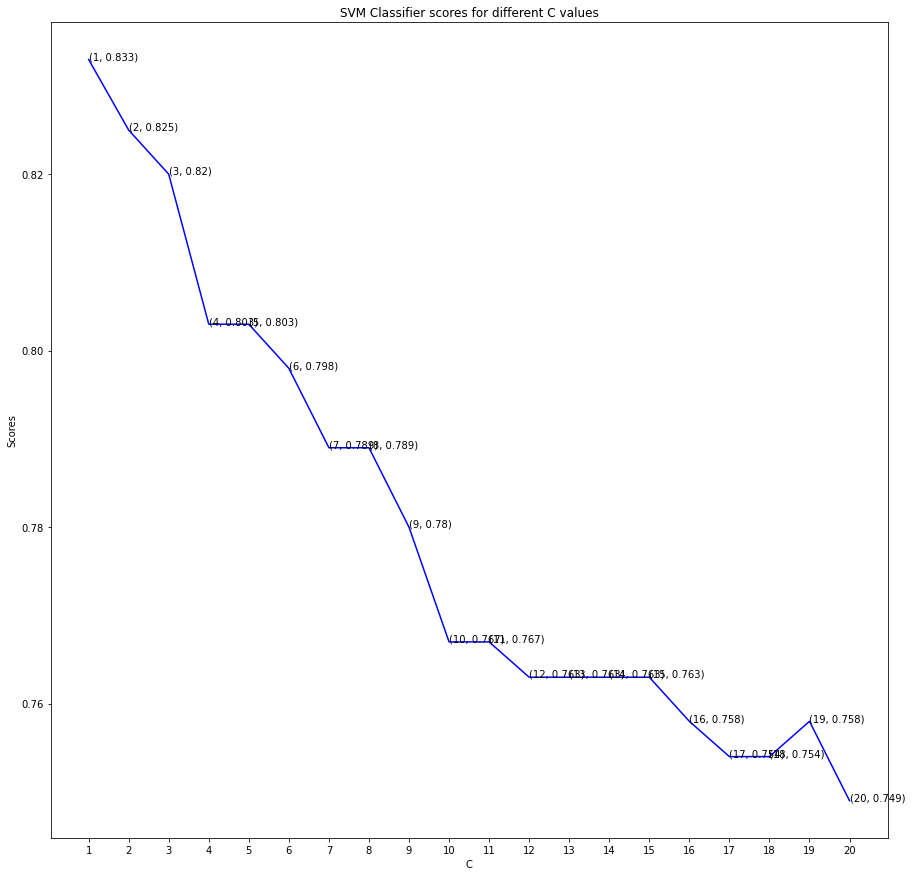

In [26]:
# Importing libraries
from sklearn.svm import SVC

# Finding the best accuracy using cross val score
cross_val_scores = []
for i in range(1, 21):
  classifier_svc = classifier = SVC(kernel = 'rbf', gamma = 'scale', C = i)
  scores = cross_val_score(classifier_svc, X_train, y_train, cv = 10)
  cross_val_scores.append(round(scores.mean(), 3))

# Plotting the scores
plt.figure(figsize = (15, 15))
plt.plot([k for k in range(1, 21)], cross_val_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, cross_val_scores[i-1], (i, cross_val_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('C')
plt.ylabel('Scores')
plt.title('SVM Classifier scores for different C values')

In [27]:
# Training the linear regression classifier model with C value as 1
classifier_svc = classifier = SVC(kernel = 'rbf', gamma = 'scale', C = 1)
scores = cross_val_score(classifier_svc, X_train, y_train, cv = 10)
print("SVM Classifier Accuracy(C = 1) : {}%".format(round(scores.mean(), 4)*100))

SVM Classifier Accuracy(C = 1) : 83.3%


## K-Nearest-Neighbors

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

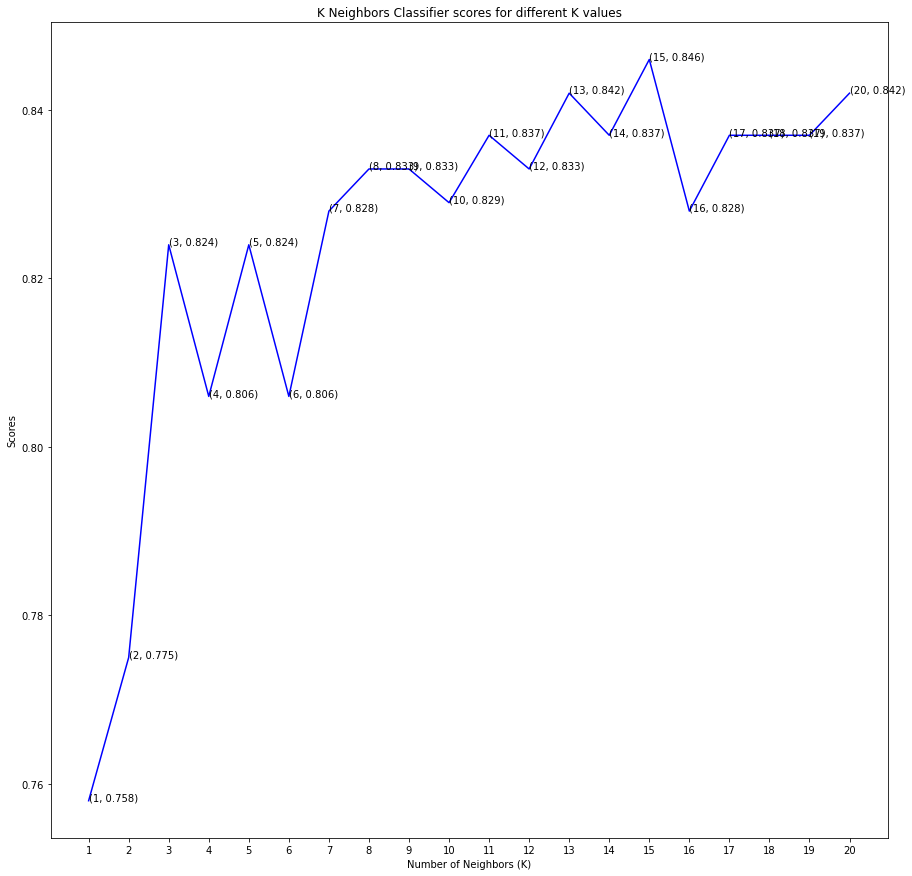

In [28]:
# Importing libraries
from sklearn.neighbors import KNeighborsClassifier

# Finding the best accuracy using cross val score
cross_val_scores = []
for i in range(1, 21):
  classifier_knn = KNeighborsClassifier(n_neighbors = i)
  scores = cross_val_score(classifier_knn, X_train, y_train, cv = 10)
  cross_val_scores.append(round(scores.mean(), 3))

# Plotting the scores
plt.figure(figsize = (15, 15))
plt.plot([k for k in range(1, 21)], cross_val_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, cross_val_scores[i-1], (i, cross_val_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [29]:
# Training model with k value 15
classifier_knn = KNeighborsClassifier(n_neighbors = 15)
scores = cross_val_score(classifier_knn, X_train, y_train, cv = 10)

print("KNN Classifier Accuracy(k = 15) : {}%".format(round(scores.mean(), 4)*100))

KNN Classifier Accuracy(k = 15) : 84.6%


## Decision Tree

Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

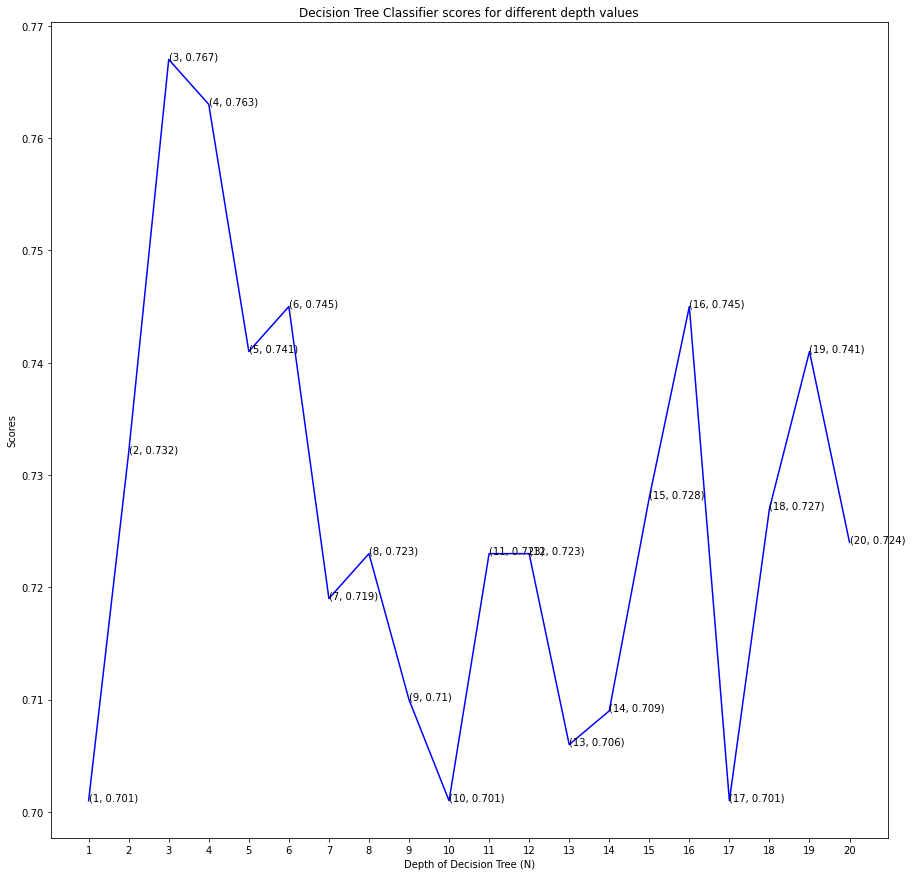

In [30]:
# Importing the libraries
from sklearn.tree import DecisionTreeClassifier

# Finding the best accuracy using cross val score
decision_scores = []
for i in range(1, 21):
  classifier_decision = DecisionTreeClassifier(criterion = 'gini', max_depth = i)
  scores = cross_val_score(classifier_decision, X_train, y_train, cv = 10)
  decision_scores.append(round(scores.mean(), 3))

# Plotting the scores
plt.figure(figsize = (15, 15))
plt.plot([k for k in range(1, 21)], decision_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')


In [31]:
# Training the decision tree classifier model with max_depth value as 3
classifier_decision = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
scores = cross_val_score(classifier_decision, X_train, y_train, cv=10)
print("Decision Tree Classifier Accuracy(max depth  3) : {}%".format(round(scores.mean(), 4)*100))

Decision Tree Classifier Accuracy(max depth  3) : 76.68%


## Random Forest

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

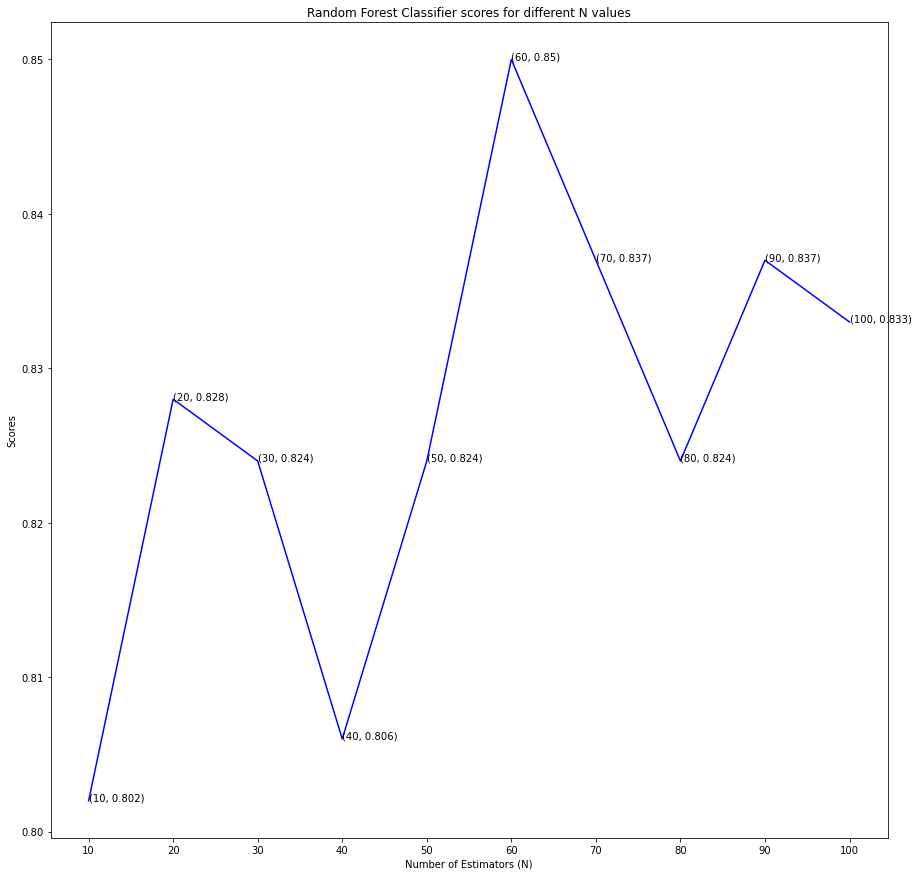

In [32]:
# Importing the libraries
from sklearn.ensemble import RandomForestClassifier

# Finding the best accuracy using cross val score
forest_scores = []
for i in range(10, 101, 10):
  classifier_forest = RandomForestClassifier(n_estimators = i)
  scores = cross_val_score(classifier_forest, X_train, y_train, cv = 10)
  forest_scores.append(round(scores.mean(), 3))

# Plotting the scores
plt.figure(figsize = (15, 15))
plt.plot([k for k in range(10, 101, 10)], forest_scores, color = 'blue')
for i in range(1,11):
    plt.text(i * 10, forest_scores[i-1], (i * 10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')


In [33]:
# Training the random forest classifier model with n value as 30
classifier_forest = RandomForestClassifier(n_estimators=30)
scores = cross_val_score(classifier_forest, X, y, cv=10)
print("Random Forest Classifier Accuracy(n_estimators = 30) : {}%".format(round(scores.mean(), 4)*100))

Random Forest Classifier Accuracy(n_estimators = 30) : 85.81%


*Note: Since the Logistic Regression algorithm has the highest accuracy, we futher fine tune the model using hyperparameter optimization.*

In [34]:
# Creating a Logistic Regression model
classifier = LogisticRegression(solver='lbfgs', multi_class='auto', C = 1)
scores = cross_val_score(classifier, X_train, y_train, cv = 10)
print("Linear Regression Classifier Accuracy(C = 1) : {}%".format(round(scores.mean(), 4)*100))

Linear Regression Classifier Accuracy(C = 1) : 85.06%


In [36]:
# Fitting it to the dataset
classifier.fit(X_train, y_train)

LogisticRegression(C=1)

# Model Evaluation

In [37]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  7]
 [ 4 39]]


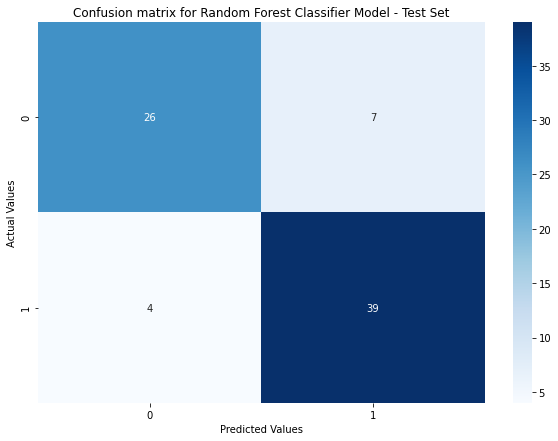

In [38]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [39]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 85.53%


In [40]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.85      0.91      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [41]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

[[ 87  18]
 [ 12 110]]


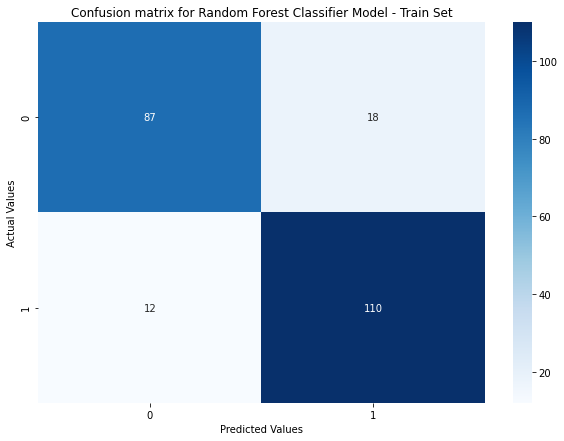

In [42]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [43]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 86.78%


In [44]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       105
           1       0.86      0.90      0.88       122

    accuracy                           0.87       227
   macro avg       0.87      0.87      0.87       227
weighted avg       0.87      0.87      0.87       227



# Saving the model

In [45]:
import pickle
# Creating a pickle file for the classifier
filename = 'heart-disease-predictor-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))
print("Model Saved Successfully")

Model Saved Successfully
